<a href="https://colab.research.google.com/github/Gladn/DM/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

Создание простой сверточной нейронной сети

# Кошки и собаки

Создание нейронной сети для различия кошек и собак
Используются библиотека tensorflow
https://www.tensorflow.org/

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from matplotlib import pyplot as pyplot

Необоходимо привести изображения к одному вида


In [3]:
def preproccess(img, label):
  return tf.image.resize(img,[200,200])/255, label

Необходимо все данные разделить на несколько частей train()/valid()/test()

In [15]:
split = ["train[:70%]","train[70%:]"]

сами датасеты 

In [19]:
trainDataset,testDataset = tfds.load(name = 'cats_vs_dogs', 
                                     split = split, 
                                     as_supervised = True)

Разделение всего куска датасета на пакеты(партии) batch, чтоб не было перегрузки

In [20]:
trainDataset = trainDataset.map(preproccess).batch(32)
testDataset = testDataset.map(preproccess).batch(32)

Модель и ее параметры 
Сверточной слой его размеры и шаги
maxpooling самое больше число из операции свертки 

# Новый раздел

flatten - создание массива из матрицы
dense слои 

In [21]:
model = keras.Sequential([keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(200,200,3)),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512,activation = 'relu'),
                          keras.layers.Dense(1,activation = 'sigmoid'),                      
])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

trainHistory = model.fit(trainDataset, epochs=1,validation_data=testDataset)

509/509 [==============================] - 703s 1s/step - loss: 0.6310 - accuracy: 0.6546 - val_loss: 0.5532 - val_accuracy: 0.7093


--------------------------------------------

Создание графиков 

пппппппп

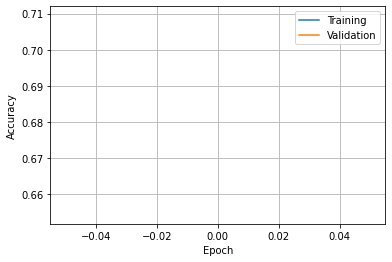

In [23]:
pyplot.plot(trainHistory.history['accuracy'])
pyplot.plot(trainHistory.history['val_accuracy'])
pyplot.ylabel('Accuracy')
pyplot.xlabel("Epoch")
pyplot.legend(['Training','Validation'])
pyplot.grid()
pyplot.show()

In [24]:
(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

219/219 [==============================] - 88s 402ms/step - loss: 1.2563 - accuracy: 0.7631
1.2563344240188599
0.7631465792655945


Созранение модели

In [11]:
model.save("model1.h5")

In [25]:
model.save("model2.h5")

model = keras.models.load_model("model1.h5")

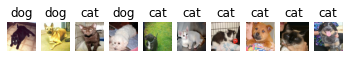

In [148]:
model = keras.models.load_model("model1.h5")
predictions = model.predict(testDataset.take(10))

classNames=['cat','dog']

i = 0
fig, ax = pyplot.subplots(1,10)
for image, _ in testDataset.take(10):
  predictedLabel = int(predictions[i] >= 0.5)

  ax[i].axis('off')
  ax[i].set_title(classNames[predictedLabel])
  ax[i].imshow(image[i])
  i += 1

pyplot.show()

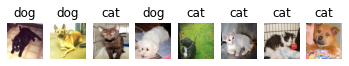

In [30]:
model = keras.models.load_model("model2.h5")
predictions = model.predict(testDataset.take(8))

classNames=['cat','dog']

i = 0
fig, ax = pyplot.subplots(1,8)
for image, _ in testDataset.take(8):
  predictedLabel = int(predictions[i] >= 0.5)
  ax[i].axis('off')
  ax[i].set_title(classNames[predictedLabel])
  ax[i].imshow(image[i])
  i += 1

pyplot.show()

In [31]:
model = keras.Sequential([keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(200,200,3)),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512,activation = 'relu'),
                          keras.layers.Dense(1,activation = 'sigmoid')                     
])

In [33]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

trainHistory = model.fit(trainDataset, epochs=5,validation_data=testDataset)

Epoch 1/5
509/509 [==============================] - 719s 1s/step - loss: 0.6540 - accuracy: 0.5988 - val_loss: 0.5889 - val_accuracy: 0.6780
Epoch 2/5
509/509 [==============================] - 713s 1s/step - loss: 0.5284 - accuracy: 0.7303 - val_loss: 0.4824 - val_accuracy: 0.7686
Epoch 3/5
509/509 [==============================] - 709s 1s/step - loss: 0.4386 - accuracy: 0.7949 - val_loss: 0.4914 - val_accuracy: 0.7597
Epoch 4/5
509/509 [==============================] - 705s 1s/step - loss: 0.3728 - accuracy: 0.8357 - val_loss: 0.4209 - val_accuracy: 0.8090
Epoch 5/5
509/509 [==============================] - 704s 1s/step - loss: 0.2992 - accuracy: 0.8714 - val_loss: 0.4558 - val_accuracy: 0.8061


In [34]:
(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

219/219 [==============================] - 87s 394ms/step - loss: 0.4558 - accuracy: 0.8061
0.4558483958244324
0.8061326742172241


In [35]:
model.save("model3.h5")

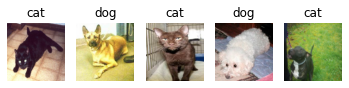

In [62]:
model = keras.models.load_model("model3.h5")
predictions = model.predict(testDataset.take(5))

classNames=['cat','dog']

i = 0
fig, ax = pyplot.subplots(1,5)
for image, _ in testDataset.take(5):
  predictedLabel = int(predictions[i] >= 0.8)
  ax[i].axis('off')
  ax[i].set_title(classNames[predictedLabel])
  ax[i].imshow(image[i])
  i += 1

pyplot.show()

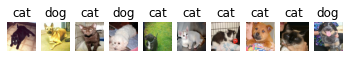

In [152]:
model = keras.models.load_model("model3.h5")
predictions = model.predict(testDataset.take(10))
classNames=['cat','dog']
i = 0
fig, ax = pyplot.subplots(1,10)
for image, _ in testDataset.take(10):
  predictedLabel = int(predictions[i] >= 0.8)
  ax[i].axis('off')
  ax[i].set_title(classNames[predictedLabel])
  ax[i].imshow(image[i])
  i += 1

pyplot.show()

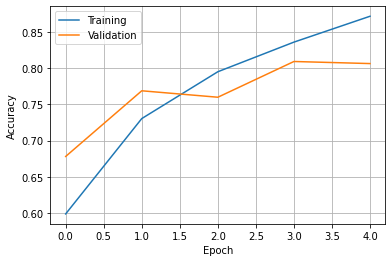

In [151]:

pyplot.plot(trainHistory.history['accuracy'])
pyplot.plot(trainHistory.history['val_accuracy'])
pyplot.ylabel('Accuracy')
pyplot.xlabel("Epoch")
pyplot.legend(['Training','Validation'])
pyplot.grid()
pyplot.show()

In [146]:
model = keras.models.load_model("model1.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [158]:
model = keras.models.load_model("model3.h5")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 64)      

In [127]:
from IPython.display import Image as Im

In [154]:
Image1 = '123.jpg'

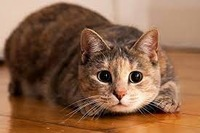

In [155]:
Im(Image1)

In [131]:
import numpy

In [156]:
Image2 = '321.jpg'

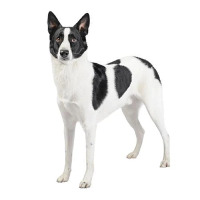

In [157]:
Im(Image2)

In [171]:
img_width, img_height = 200, 200
img = keras.preprocessing.image.load_img('123.jpg', target_size = (img_width, img_height))
img = keras.preprocessing.image.img_to_array(img)
img = numpy.expand_dims(img, axis = 0)
model.predict(img)


array([[0.]], dtype=float32)

In [172]:
img_width, img_height = 200, 200
img = keras.preprocessing.image.load_img('321.jpg', target_size = (img_width, img_height))
img = keras.preprocessing.image.img_to_array(img)
img = numpy.expand_dims(img, axis = 0)
model.predict(img)

array([[1.]], dtype=float32)